# Project: Exploring a Dataset (Titanic dataset)
   ## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#explanatory data analysis">Explanatory Data Analysis</a></li>
</ul>

# Introduction
In this analysis, I will explore Titanic dataset, find relationships among its 12 associated variables (characteristics):
### Variables:
  - PassengerId
  - Survived
  - Pclass: Ticket class 1 or 2 or 3  
  - Name: passenger name
  - Sex
  - Age
  - SibSp: number of siblings / spouses aboard the Titanic
  - Parch: number of parents / children aboard the Titanic
  - Ticket
  - Fare
  - Cabin
  - Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
  
### Questions
   * (1) Was people from the first class, more likely to survive ?
   * (2) Was survival rate bigger with females than males?
   * (3) Was young people more likely to survive? 
   * (4) did the number of siblings affect the survival rate?
   * (5) did the number of parents / children affect the survival rate?
   * (6) Did the port of embarkation affect the survival rate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# Data Wrangling

In [2]:
df = pd.read_csv('titanic/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking whther there is any duplicated rows
df.duplicated().sum()

0

In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#droping unecessary columns in terms of analysis
df.drop(columns = ['Name', 'Ticket', 'PassengerId', 'Cabin'], inplace= True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
#checking whether there is any null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
#dropping null values
df.dropna(inplace= True)
df.shape

(712, 8)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
#summary statistics
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


# Exploratory Data Analysis

## Univariate exploration

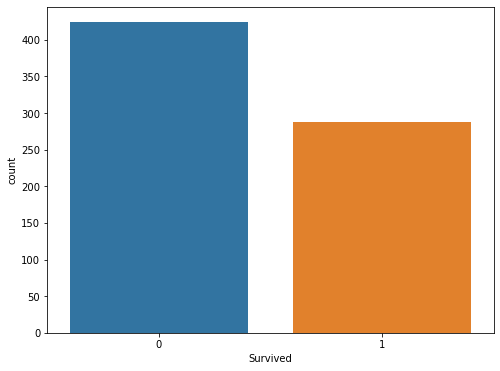

In [13]:
plt.figure(figsize = [8, 6])
sb.countplot(df['Survived']);

Number of people who died is bigger than number of people who survived

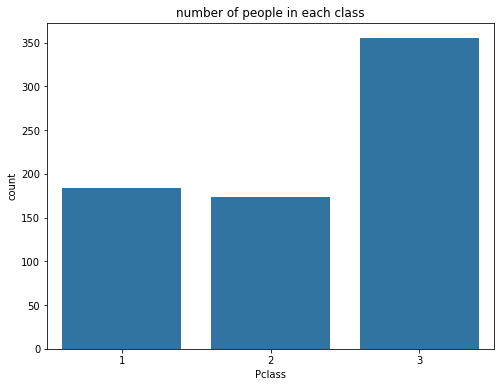

In [14]:
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(df['Pclass'], color = base_color)
plt.title('number of people in each class');

Number of people in the third class was almost equal to number of people in first and second ones together

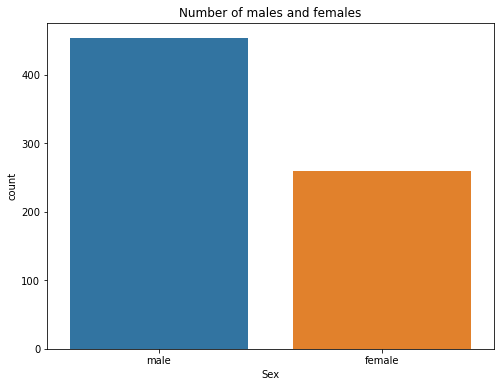

In [15]:
plt.figure(figsize = [8, 6])
sb.countplot(df['Sex'])
plt.title('Number of males and females');

Number of males was bigger than males on the ship 

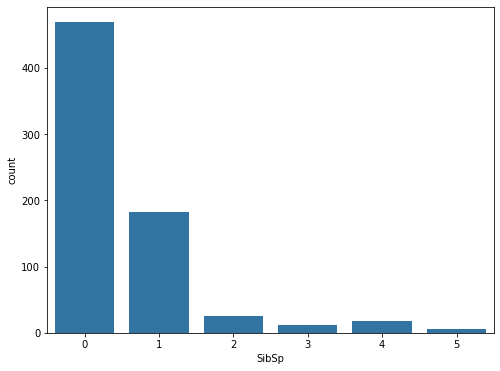

In [16]:
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(df['SibSp'], color= base_color);

most of Passengers had no siblings 

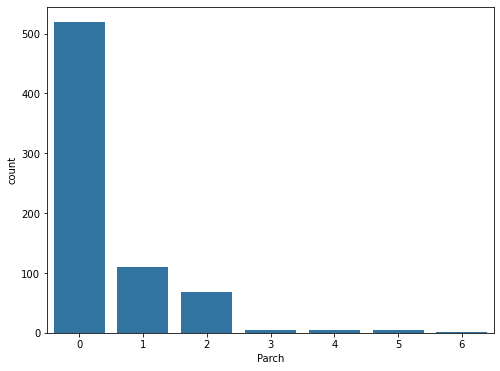

In [17]:
plt.figure(figsize = [8, 6])
sb.countplot(df['Parch'], color = base_color);

Number of passengers had zero number of parents / children

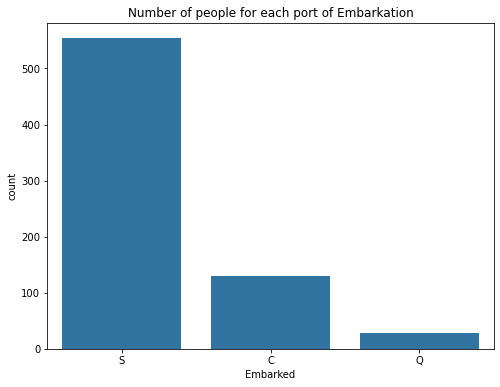

In [18]:
plt.figure(figsize = [8, 6])
sb.countplot(df['Embarked'], color = base_color)
plt.title('Number of people for each port of Embarkation');

Most of the passengers embarked from southampton port 

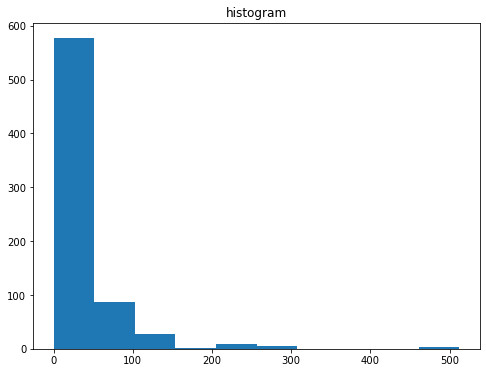

In [19]:
plt.figure(figsize = [8, 6])
plt.hist(df['Fare'])
plt.title('histogram');

The histogram is strongly right skewed, having low fares on the left and high fares on the right. from the histogram it seems that number of people with high fare is very high in comparison with people with low fares

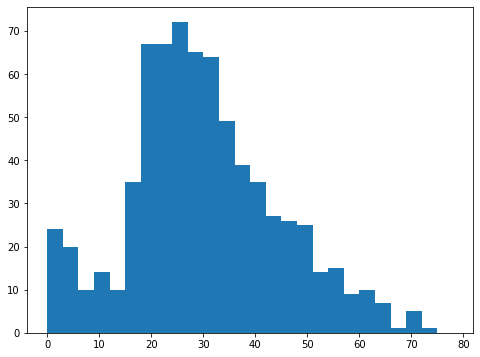

In [20]:
plt.figure(figsize = [8, 6])
bins = np.arange(0, 80, 3)
plt.hist(df['Age'], bins= bins);

The histogram is slightly bimodel and it's little right skewed. Most of passengers are at the range of (20, 35) in terms of age

## Bivariate visualization

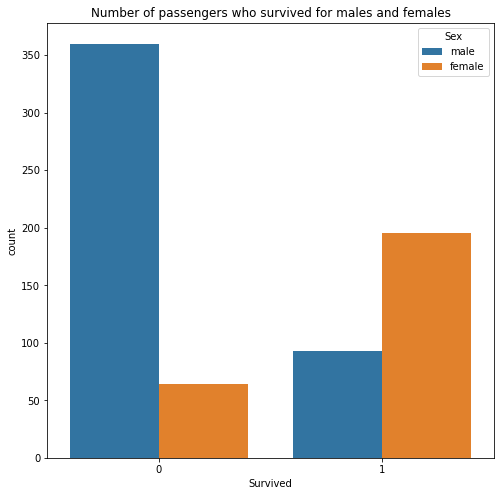

In [21]:
plt.figure(figsize = [8, 8])
sb.countplot(data = df, x = 'Survived', hue = 'Sex')
plt.title('Number of passengers who survived for males and females');

Most of the womwns survived, while most of the men didn't survived

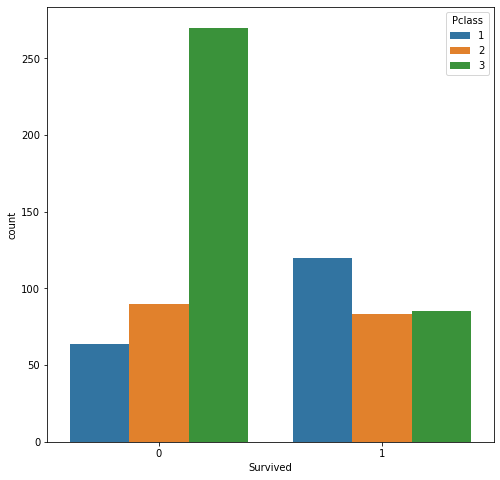

In [22]:
plt.figure(figsize = [8, 8])
sb.countplot(data = df, x = 'Survived', hue = 'Pclass');

Most of the passengers from the third class didn't survive

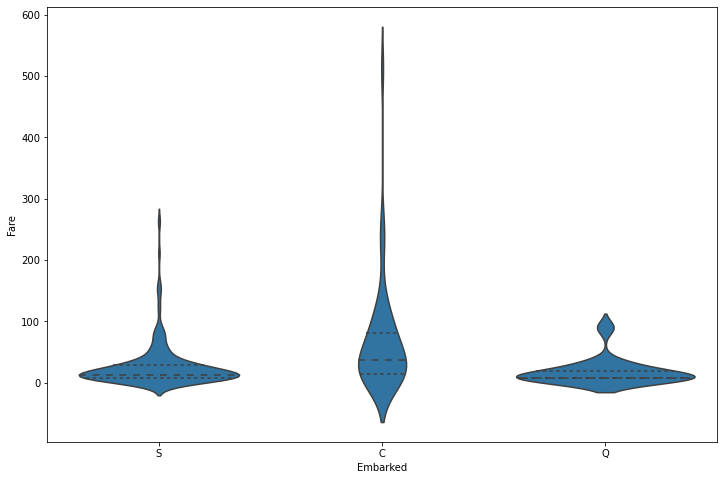

In [23]:
#violin plots 
plt.figure(figsize = [12, 8])
sb.violinplot(data = df, x = 'Embarked', y = 'Fare', color = base_color, inner = 'quartile');

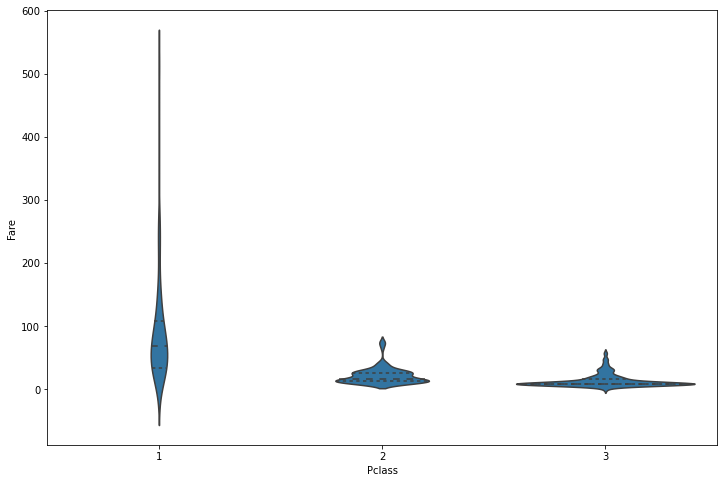

In [24]:
plt.figure(figsize = [12, 8])
sb.violinplot(data = df, x = 'Pclass', y = 'Fare', color = base_color, inner = 'quartile');

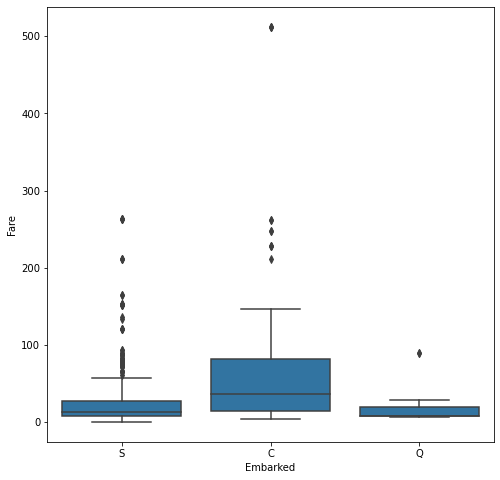

In [25]:
#using check whether there is outliers
plt.figure(figsize = [8, 8])
sb.boxplot(data = df, x = 'Embarked', y = 'Fare', color = base_color);

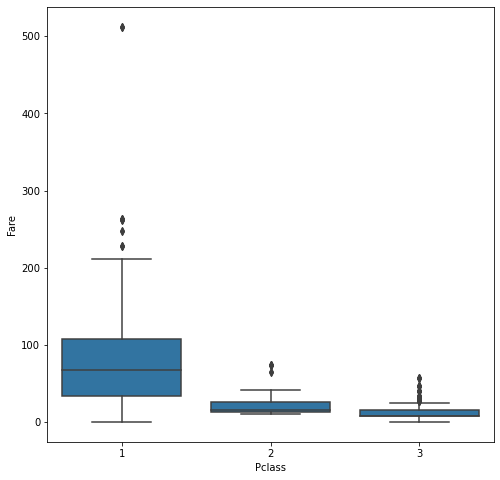

In [26]:
#using boxplots to check whether there is outliers
plt.figure(figsize = [8, 8])
sb.boxplot(data = df, x = 'Pclass', y = 'Fare', color = base_color);

Some of the passengers from class one have paid very high fare, and it seems that class one have paid higher fare than other classes 

### Cheking whether there is correlation between numeric variables

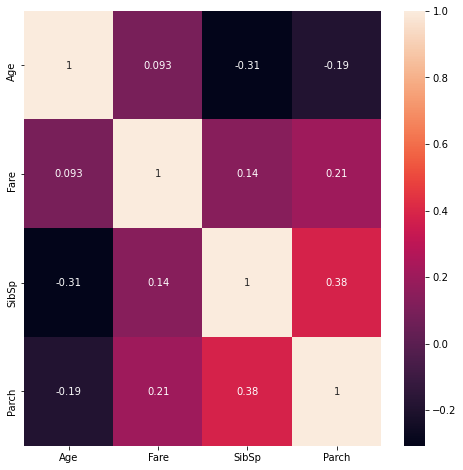

In [27]:
#quantitative features
quan_df = df[['Age', 'Fare', 'SibSp', 'Parch']]
#heatmap
plt.figure(figsize = [8, 8])
sb.heatmap(quan_df.corr(), annot = True);

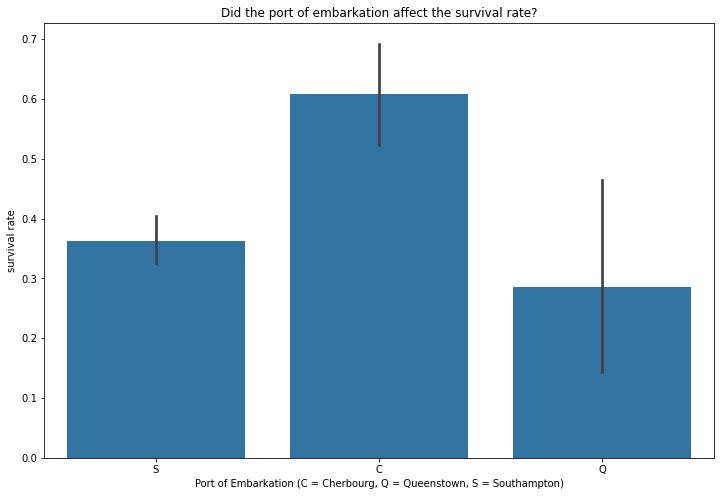

In [28]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'Embarked', y = 'Survived', color = base_color)
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('survival rate')
plt.title('Did the port of embarkation affect the survival rate?');

People who embarked from Cherbourg were more likely to survive, but this doesn't mean that this was a reason (correlation doesn't imply causation)

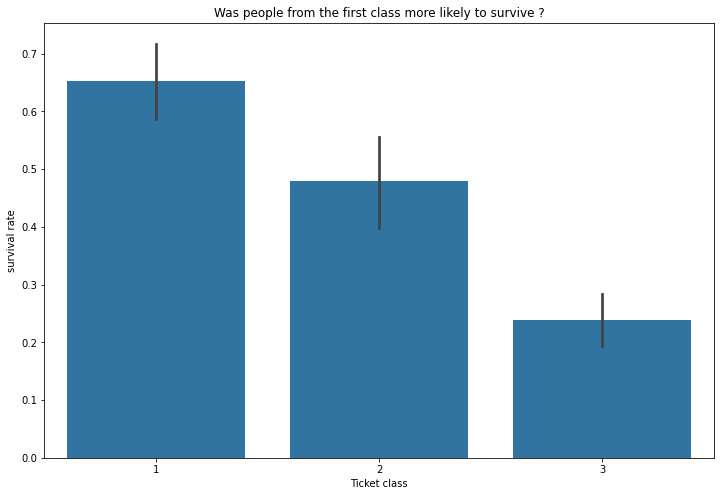

In [29]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'Pclass', y = 'Survived', color = base_color)
plt.xlabel('Ticket class')
plt.ylabel('survival rate')
plt.title('Was people from the first class more likely to survive ?');

People from first class were more likely to survive than people from second class, and people from second class were more likely to survive than people from the third class

In [30]:
#creating age groups
category = pd.cut(df.Age, bins = [0, 14, 24, 65, 115], labels=['childrens', 'youth', 'adults', 'seniors'])
df.insert(5, 'age_group', category)

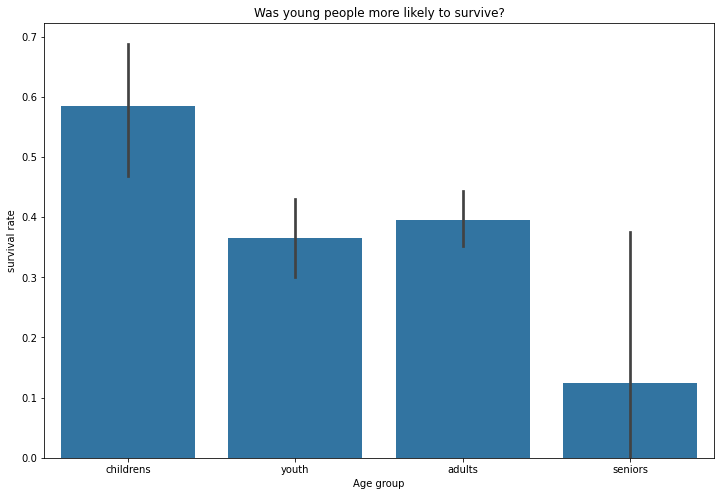

In [31]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'age_group', y = 'Survived', color = base_color)
plt.xlabel('Age group')
plt.ylabel('survival rate')
plt.title('Was young people more likely to survive?');

Childrens were more likely to survive

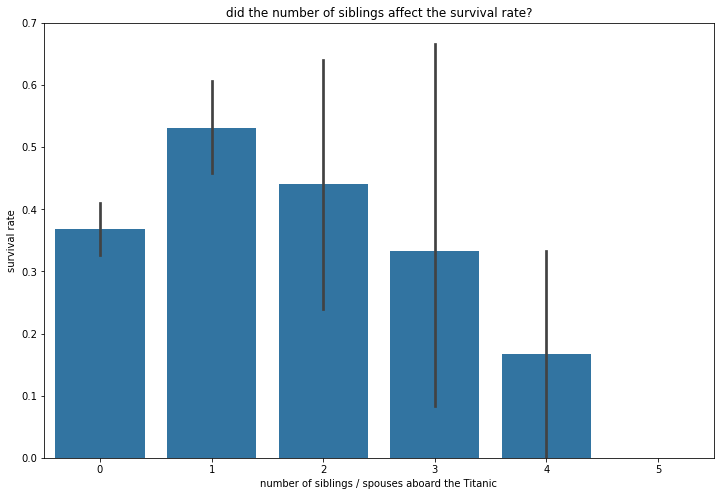

In [32]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'SibSp', y = 'Survived', color = base_color)
plt.xlabel('number of siblings / spouses aboard the Titanic')
plt.ylabel('survival rate')
plt.title('did the number of siblings affect the survival rate?');

Yes, number of siblings affect the survival rate

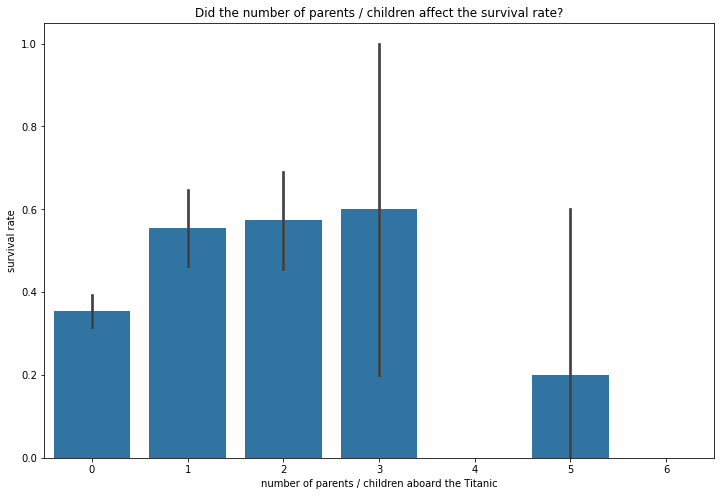

In [33]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'Parch', y = 'Survived', color = base_color)
plt.xlabel('number of parents / children aboard the Titanic')
plt.ylabel('survival rate')
plt.title('Did the number of parents / children affect the survival rate?');

yes, number of parents / children affect the survival rate

## Multivariate Exploration

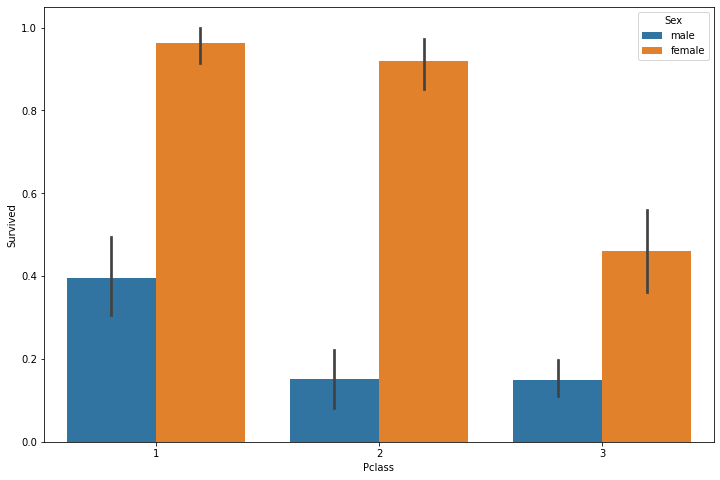

In [34]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'Pclass', y = 'Survived', hue = 'Sex');

#### Insights
 - Survival rate was bigger with females than males
 - men with first class tickets were more likely to survive than other men
 - women with third class tickets had a small survival rate

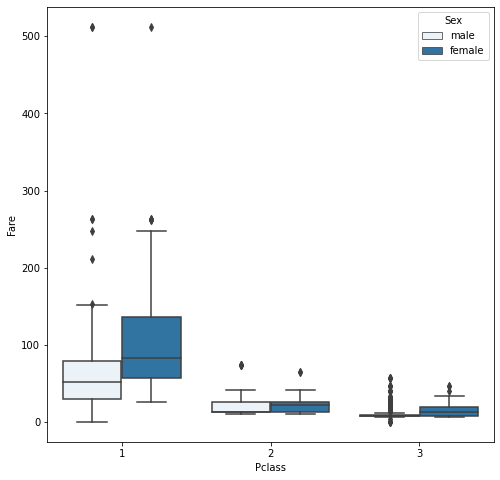

In [35]:
plt.figure(figsize = [8, 8])
sb.boxplot(data = df, x = 'Pclass', y = 'Fare', color = base_color, hue = 'Sex');

In class one most of the women have paid higher fare than men, and the same thing happened with class three 